In [16]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.decomposition import NMF, LatentDirichletAllocation


In [18]:
data = pd.read_csv(r'../dataprocessed/datos_preprocesados.csv')
data

,timestamp_formatted,model_name,Price (Dollar),Storage (GB),review,timestamp,stars,country,language,tk_review,timestamp_nanosec
0,01/01/1970,iPhone 13 Pro Max,1049.70,128,device does not come with a power adapter! how...,1970-01-01,1,the United States,en,"['device', 'come', 'power', 'adapter', '!', 'e...",0
1,01/01/1970,13 Pro Max,579.99,128,"bought the product, i was very skeptical at fi...",1970-01-01,5,the United States,en,"['bought', 'product', ',', 'skeptical', 'first...",0
2,01/01/1970,iPhone 13,767.14,128,not a verified buyer as i purchased the model ...,1970-01-01,2,the United States,en,"['verified', 'buyer', 'purchased', 'model', '1...",0
3,01/01/1970,iPhone 14,552.01,128,if i could send negative stars i would. the ph...,1970-01-01,1,the United States,en,"['could', 'send', 'negative', 'stars', 'would'...",0
4,01/01/1970,iPhone SE,199.99,16,the phone came a day early which was great. it...,1970-01-01,4,the United States,en,"['phone', 'came', 'day', 'early', 'great', '.'...",0
...,...,...,...,...,...,...,...,...,...,...,...
585,25/12/1974,iPhone XR,168.39,64,got it to replace my 13 year olds xr in a pinc...,1974-12-25,5,the United States,en,"['got', 'replace', '13', 'year', 'olds', 'xr',...",157161600000000000
586,28/12/1974,iPhone XR,181.00,64,my little niece is so inlove with this phone😌 ...,1974-12-28,5,the United States,en,"['little', 'niece', 'inlove', 'phone', '😌', 'b...",157420800000000000
587,30/12/1974,iPhone XR,181.00,64,great buy\nread more,1974-12-30,5,the United States,en,"['great', 'buy', 'read']",157593600000000000
588,01/01/1975,iPhone XR,168.39,64,"hey guys, so i ordered this phone on the 19th ...",1975-01-01,5,the United States,en,"['hey', 'guys', ',', 'ordered', 'phone', '19th...",157766400000000000


In [22]:

# Asegúrate de que la columna 'timestamp' esté en formato datetime
# Asegúrate de que la columna 'timestamp' esté en formato datetime
data['timestamp'] = pd.to_datetime(data['timestamp'])

# Extraer solo el año
data['año'] = data['timestamp'].dt.year

# Crear una nueva columna 'año_categoria' que asigne un número a cada año, comenzando desde 1 para 1970
data['año_categoria'] = data['año'].rank(method='dense').astype(int)

data




,timestamp_formatted,model_name,Price (Dollar),Storage (GB),review,timestamp,stars,country,language,tk_review,timestamp_nanosec,año,año_categoria
0,01/01/1970,iPhone 13 Pro Max,1049.70,128,device does not come with a power adapter! how...,1970-01-01,1,the United States,en,"['device', 'come', 'power', 'adapter', '!', 'e...",0,1970,1
1,01/01/1970,13 Pro Max,579.99,128,"bought the product, i was very skeptical at fi...",1970-01-01,5,the United States,en,"['bought', 'product', ',', 'skeptical', 'first...",0,1970,1
2,01/01/1970,iPhone 13,767.14,128,not a verified buyer as i purchased the model ...,1970-01-01,2,the United States,en,"['verified', 'buyer', 'purchased', 'model', '1...",0,1970,1
3,01/01/1970,iPhone 14,552.01,128,if i could send negative stars i would. the ph...,1970-01-01,1,the United States,en,"['could', 'send', 'negative', 'stars', 'would'...",0,1970,1
4,01/01/1970,iPhone SE,199.99,16,the phone came a day early which was great. it...,1970-01-01,4,the United States,en,"['phone', 'came', 'day', 'early', 'great', '.'...",0,1970,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
585,25/12/1974,iPhone XR,168.39,64,got it to replace my 13 year olds xr in a pinc...,1974-12-25,5,the United States,en,"['got', 'replace', '13', 'year', 'olds', 'xr',...",157161600000000000,1974,5
586,28/12/1974,iPhone XR,181.00,64,my little niece is so inlove with this phone😌 ...,1974-12-28,5,the United States,en,"['little', 'niece', 'inlove', 'phone', '😌', 'b...",157420800000000000,1974,5
587,30/12/1974,iPhone XR,181.00,64,great buy\nread more,1974-12-30,5,the United States,en,"['great', 'buy', 'read']",157593600000000000,1974,5
588,01/01/1975,iPhone XR,168.39,64,"hey guys, so i ordered this phone on the 19th ...",1975-01-01,5,the United States,en,"['hey', 'guys', ',', 'ordered', 'phone', '19th...",157766400000000000,1975,6


In [31]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation

data['timestamp'] = pd.to_datetime(data['timestamp'])
data['año'] = data['timestamp'].dt.year

# Agrupar reseñas por año
documents_per_year = data.groupby('año')['review'].apply(lambda x: ' '.join(x)).reset_index()
documents_per_year.columns = ['año', 'documento']

# Vectorizar y aplicar LDA
vectorizer = CountVectorizer(max_df=0.9, min_df=2, stop_words='english')
dtm = vectorizer.fit_transform(documents_per_year['documento'])
lda = LatentDirichletAllocation(n_components=5, random_state=42)
lda.fit(dtm)

# Mostrar tópicos
def display_topics(model, feature_names, no_top_words):
    for topic_idx, topic in enumerate(model.components_):
        print(f"Topic {topic_idx + 1}: ", " ".join([feature_names[i] for i in topic.argsort()[:-no_top_words - 1:-1]]))

display_topics(lda, vectorizer.get_feature_names_out(), 10)

# Asignar tópicos por año
topic_distribution = lda.transform(dtm)
documents_per_year['top_topic'] = topic_distribution.argmax(axis=1)
print(documents_per_year[['año', 'top_topic']])


Topic 1:  siri guys generations hey talking happen complaints compatible dents glass
Topic 2:  siri guys compatible complaints hey functions dents happen glass generations
Topic 3:  new good like just 13 health apple max camera amazon
Topic 4:  siri guys compatible complaints hey functions dents happen glass generations
Topic 5:  new amazon apple good like renewed brand time pro just
    año  top_topic
0  1970          4
1  1971          4
2  1972          2
3  1973          4
4  1974          4
5  1975          0


In [33]:
# Calcular la media de los ratings por año
media_ratings_por_año = data.groupby('año')['stars'].mean().reset_index()
media_ratings_por_año.columns = ['año', 'media_rating']

# Mostrar la media de los ratings por año
print(media_ratings_por_año)



    año  media_rating
0  1970      4.096429
1  1971      3.775510
2  1972      4.236842
3  1973      4.320755
4  1974      4.481481
5  1975      5.000000


                                              review  sentimiento
0  device does not come with a power adapter! how...      0.50000
1  bought the product, i was very skeptical at fi...      0.95060
2  not a verified buyer as i purchased the model ...      0.05865
3  if i could send negative stars i would. the ph...      0.02140
4  the phone came a day early which was great. it...      0.99260


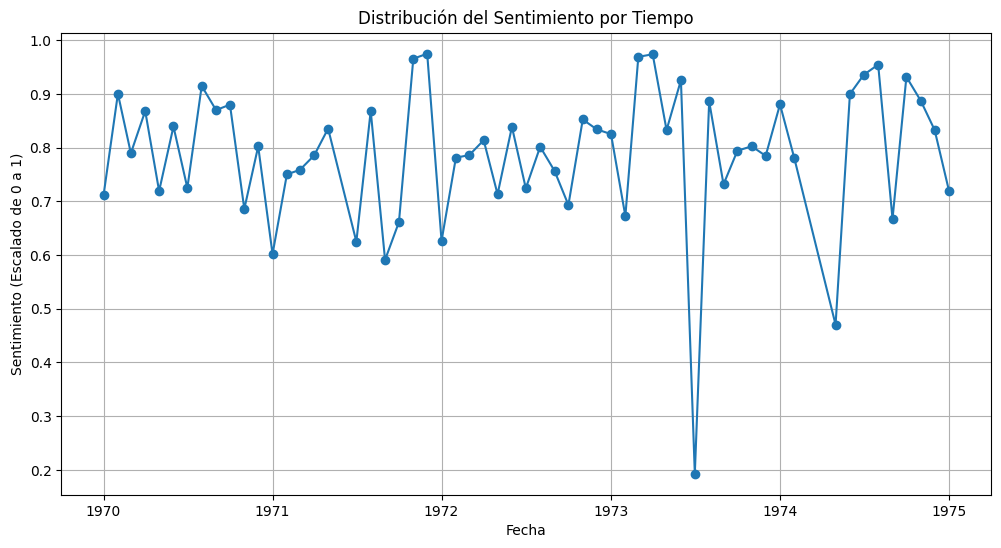

In [47]:

from nltk.sentiment.vader import SentimentIntensityAnalyzer

# Inicializar el analizador de sentimiento
sia = SentimentIntensityAnalyzer()

# Función para obtener el puntaje de sentimiento
def obtener_sentimiento(review):
    return sia.polarity_scores(review)['compound']

# Aplicar la función a la columna 'review' y escalar el resultado de -1 a 1 a 0 a 1
data['sentimiento'] = data['review'].apply(obtener_sentimiento)
data['sentimiento'] = (data['sentimiento'] + 1) / 2

# Mostrar las primeras filas para verificar
print(data[['review', 'sentimiento']].head())


import matplotlib.pyplot as plt

# Crear una nueva columna 'fecha' a partir del timestamp
data['fecha'] = pd.to_datetime(data['timestamp'], unit='s')

# Agrupar por fecha y calcular la media del sentimiento
sentimiento_por_fecha = data.groupby(data['fecha'].dt.to_period('M'))['sentimiento'].mean().reset_index()
sentimiento_por_fecha['fecha'] = sentimiento_por_fecha['fecha'].dt.to_timestamp()

# Graficar la distribución del sentimiento por tiempo
plt.figure(figsize=(12, 6))
plt.plot(sentimiento_por_fecha['fecha'], sentimiento_por_fecha['sentimiento'], marker='o')
plt.title('Distribución del Sentimiento por Tiempo')
plt.xlabel('Fecha')
plt.ylabel('Sentimiento (Escalado de 0 a 1)')
plt.grid(True)
plt.show()





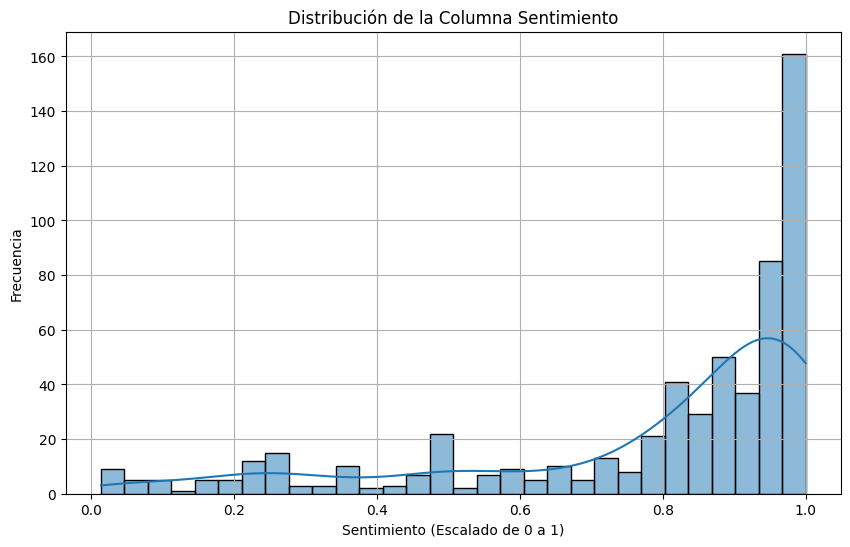

In [48]:
import seaborn as sns

# Crear una gráfica de distribución para la columna 'sentimiento'
plt.figure(figsize=(10, 6))
sns.histplot(data['sentimiento'], bins=30, kde=True)
plt.title('Distribución de la Columna Sentimiento')
plt.xlabel('Sentimiento (Escalado de 0 a 1)')
plt.ylabel('Frecuencia')
plt.grid(True)
plt.show()


In [49]:
# Calcular la media de los ratings por año
media_ratings_por_año = data.groupby('año')['sentimiento'].mean().reset_index()
media_ratings_por_año.columns = ['año', 'media_rating']

# Mostrar la media de los ratings por año
print(media_ratings_por_año)


    año  media_rating
0  1970      0.784280
1  1971      0.710830
2  1972      0.783018
3  1973      0.802746
4  1974      0.829629
5  1975      0.719575


In [54]:
# Calcular la correlación entre 'stars' y 'sentimiento' por año
correlacion_por_año = data.groupby('año')[['stars', 'sentimiento']].corr().unstack().iloc[:, 1].reset_index()
correlacion_por_año.columns = ['año', 'correlacion_stars_sentimiento']

# Mostrar la correlación entre 'stars' y 'sentimiento' por año
print(correlacion_por_año)




    año  correlacion_stars_sentimiento
0  1970                       0.584563
1  1971                       0.537716
2  1972                       0.477989
3  1973                       0.480414
4  1974                       0.476744
5  1975                            NaN


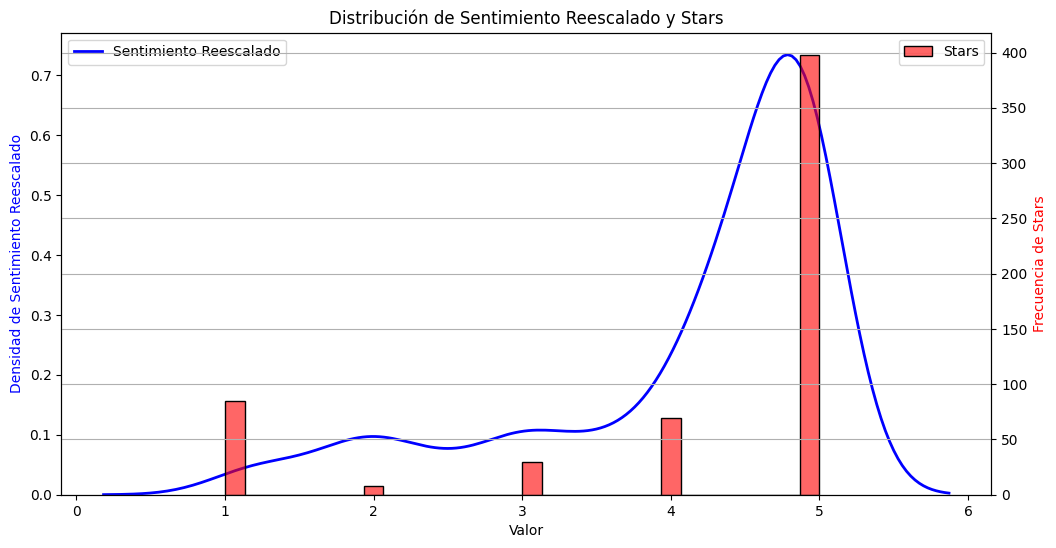

In [57]:
import matplotlib.pyplot as plt

# Reescalar la columna 'sentimiento' de 0 a 1 a 1 a 5
data['sentimiento_reescalado'] = data['sentimiento'] * 4 + 1

# Crear una figura y un eje
fig, ax1 = plt.subplots(figsize=(12, 6))

# Graficar la distribución de la columna 'sentimiento_reescalado' como una gráfica de línea
sns.kdeplot(data['sentimiento_reescalado'], ax=ax1, color='b', label='Sentimiento Reescalado', linewidth=2)

# Crear un segundo eje para la distribución de la columna 'stars'
ax2 = ax1.twinx()
sns.histplot(data['stars'], bins=30, ax=ax2, color='r', alpha=0.6, label='Stars')

# Añadir títulos y etiquetas
ax1.set_title('Distribución de Sentimiento Reescalado y Stars')
ax1.set_xlabel('Valor')
ax1.set_ylabel('Densidad de Sentimiento Reescalado', color='b')
ax2.set_ylabel('Frecuencia de Stars', color='r')

# Añadir leyendas
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

# Mostrar la gráfica
plt.grid(True)
plt.show()




In [37]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer

# Asegúrate de descargar el lexicón de VADER
import nltk
nltk.download('vader_lexicon')

# Inicializar el analizador de sentimiento
sia = SentimentIntensityAnalyzer()
# ... código existente ...

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/hugo/nltk_data...
